In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import sys
import tensorflow as tf

Using TensorFlow backend.


In [2]:
(xTrain,yTrain), (xTest,yTest) = mnist.load_data()

In [3]:
xTrain.shape #(60000, 28, 28)
xTest.shape #(10000, 28, 28)

(10000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

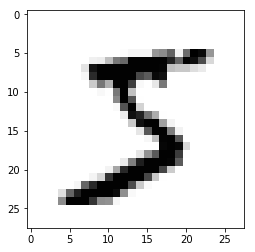

In [5]:
plt.imshow(xTrain[0], cmap='Greys')
plt.show()

In [6]:
for x in xTrain[0]:
    for i in x:
        sys.stdout.write("%d\t" %i)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [7]:
xTrain = xTrain.reshape(xTrain.shape[0], 784)
xTrain = xTrain.astype("float64")
xTrain = xTrain/255
xTest = xTest.reshape(xTest.shape[0], 784).astype("float64")/255

In [8]:
print(yTrain[0])

5


In [9]:
yTrain = np_utils.to_categorical(yTrain,10)
yTest = np_utils.to_categorical(yTest,10)

In [10]:
yTrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import  ModelCheckpoint, EarlyStopping
import os

In [12]:
#모델 구성
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
#모델 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
#모델 최적화
modelDir = './myModel/'
if not os.path.exists(modelDir):  #만약 myModel 디렉토리가 존재하지 않는다면
    modelPath = './myModel/{epoch:02d}-{val_loss:.4f}.hdf5'
    os.mkdir(modelDir)
checkpointer = ModelCheckpoint(filepath=modelPath, monitor='val_loss', verbose=1, save_best_only=True)
#ModelCheckpoint: 콜백 함수 => 어떤 상황이 되면 시스템에 의해서 호출되는 함수
#keras에서 모델을 학습할때마다 중간중간에 콜백 형태로 알려주는 역할
#save_best_only: 모델의 정확도가 최고값을 갱신했을때만 저장
es = EarlyStopping(monitor='val_loss', patience=10)

NameError: name 'modelPath' is not defined

In [31]:
#모델 생성
model.fit(xTrain,yTrain, validation_data=(xTest,yTest), epochs=30, batch_size=200, callbacks=[es, checkpointer])

NameError: name 'es' is not defined

In [ ]:
print("테스트 정확도: %.4f" % (model.evaluate(xTest, yTest)[1]))

In [32]:
#테스트 셋의 오차
yVloss=history.history['val_loss'] 
#학습 셋의 오차
yLoss=history.history['loss']

NameError: name 'history' is not defined

In [33]:
xLen=np.arange(len(yLoss))
plt.plot(xLen,yVloss, marker='.', c='red', 
         label='testset_loss')
plt.plot(xLen,yLoss, marker='.', c='blue', 
         label='trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

NameError: name 'yLoss' is not defined

## CNN으로 MNIST 모델 만들기

In [35]:
from keras.layers import *

In [36]:
#모델 구성
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1), activation='relu'))
#Conv2D(필터개수, 필터크기, (행,열,흑백), 활성화함수)
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) #드롭아웃 비율(25%)
model.add(Flatten())
#Flatten():1차원으로 변경하는 함수
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [37]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [42]:
#모델 최적화
modelDir = './myCnnModel/'
if not os.path.exists(modelDir):  #만약 myModel 디렉토리가 존재하지 않는다면
    modelPath = './myMmyCnnModelodel/{epoch:02d}-{val_loss:.4f}.hdf5'
    os.mkdir(modelDir)
checkpointer = ModelCheckpoint(filepath=modelPath, monitor='val_loss', verbose=1, save_best_only=True)
#ModelCheckpoint: 콜백 함수 => 어떤 상황이 되면 시스템에 의해서 호출되는 함수
#keras에서 모델을 학습할때마다 중간중간에 콜백 형태로 알려주는 역할
#save_best_only: 모델의 정확도가 최고값을 갱신했을때만 저장
es = EarlyStopping(monitor='val_loss', patience=10)

In [41]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()
xTrain = xTrain.reshape(xTrain.shape[0],28,28,1).astype('float32')/255
xTest = xTest.reshape(xTest.shape[0],28,28,1).astype('float32')/255
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [43]:
#모델 생성 
history = model.fit(xTrain, yTrain, validation_data=(xTest,yTest), epochs=30, batch_size=200, 
          callbacks=[es,checkpointer])


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2707 - accuracy: 0.9173 - val_loss: 0.0537 - val_accuracy: 0.9823

Epoch 00001: val_loss improved from inf to 0.05367, saving model to ./myMmyCnnModelodel/01-0.0537.hdf5


OSError: Unable to create file (unable to open file: name = './myMmyCnnModelodel/01-0.0537.hdf5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [ ]:
#model.save("파일명.h5")
# from keras.models import load_model
# model = load_model("모델파일명.h5")
# model.summary() #모델 구조 확인
# 분류결과 = model.predict_classes(테스트 데이터)

In [ ]:
#예측이 틀린 이미지를 8개 출력

In [ ]:
#iterator, generator
#iterator: 값을 차례대로 꺼낼 수 있는 객체
#for i in range(100): 0~99까지 값을 차례대로 꺼낼 수 있는 이터레이터 객체 생성

In [ ]:
#iterable(반복 가능한 객체: 문자열,딕셔너리,리스트,셋)
#객체가 iter메서드를 포함 여부: 객체가 반복 가능한지 확인
dir([1,2,3]) # __iter__
it = [1,2,3].__iter__()
it.__next__()
it.__next__()
it.__next__()
it.__next__()

In [ ]:
"hello".__iter__()
{'a':1, "b":2}.__iter__()
{1,2,3}.__iter__()

In [ ]:
it = range(3).__iter__()
it.__next__()

In [ ]:
for i in range(3):
    print(i)
#1. range에서 __iter__로 이터레이터 객체를 생성
#2. 반복할때마다 이터레이터에서 __next__를 호출해서 숫자를 꺼내서 i에 저장


In [ ]:
#내가 만든 클래스에 __iter__, __next__ 두 메서드를 구현하면, 이터레이터 생성 가능

In [ ]:
class MyCounter:
    def __getitem__(self,index):
        if index<self.stop:
            return index*10
        else:
            raise StopIteration
            
    def __init__(self,stop):
        self.current=0
        self.stop=stop
#     def __iter__(self):
#         return self
#     def __next__(self):
#         if self.current < self.stop:
#             r = self.current
#             self.current+=1
#             return r
#         else:
#             raise StopIteration
        
# for i in MyCounter(3):
#     print(i) # 0,1,2,3,4

In [ ]:
# MyCounter(3)[0]
for i in MyCounter(3):
    print(i)

In [ ]:
a,b,c = MyCounter(3)
print(a,b,c)

In [ ]:
a,b,c = map(int,input().split())

In [ ]:
print(a)

In [ ]:
#파이썬 iter함수: 객체의 __iter__ 메서드를 호출
#파이썬 next함수: 객체의 __next__ 메서드를 호출
it = iter(range(3))
next(it)
next(it)
next(it)

In [ ]:
# iter(객체, 반복을 끝낼값)
import random
it = iter(lambda: random.randint(0,5),2)
next(it)
next(it)
next(it)
next(it)

In [ ]:
#제너레이터: 이터레이터를 생성하는 함수
#함수 내부에 yield 키워드를 주면 이터레이터가 생성
def myGen():
    yield 0
    yield 1
    yield 2

In [ ]:
for i in myGen():
    print(i)

In [ ]:
mg = myGen()
dir(mg)

In [ ]:
# keras.io -> ImageDataGenerator

In [17]:
# 1. 이미지제너레이터 클래스 객체 생성
# 2. flow_from_directory() 호출 -> 제너레이터 생성

from keras.preprocessing.image import ImageDataGenerator

In [44]:
trainDataGen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory('train', target_size=(24,24), batch_size=3, class_mode='categorical')

Found 45 images belonging to 3 classes.


In [45]:
from keras.layers import *
from keras.models import Sequential

In [46]:
testDataGen = ImageDataGenerator(rescale=1./255)
testGenerator = testDataGen.flow_from_directory('test', target_size=(24,24), batch_size=3, class_mode='categorical')

Found 15 images belonging to 3 classes.


In [47]:
#크기(24,24), 채널:3, 필터:3*3, 필터개수:32, relu
model =Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3)))
#필터:3*3, 필터개수:64, relu
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#maxpool: 2*2
model.add(MaxPooling2D(pool_size=(2,2)))
#플래튿 - > Dense(128개 뉴런 출력) -> Dense(softmax)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

In [49]:
#모델 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
#fit_generator(): 제너레이터로 생성된 데이터 학습
model.fit_generator(trainGenerator, #훈련데이터 제너레이터, 
                    steps_per_epoch=15,
                    epochs=50, validation_data=testGenerator,
                    validation_steps=5)

Epoch 1/50
15/15 [==============================] - 0s 25ms/step - loss: 0.6550 - accuracy: 0.6889 - val_loss: 0.0687 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0757 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 18ms/step - loss: 2.3141e-04 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 0.9333
Epoch 6/50
15/15 [==============================] - 0s 19ms/step - loss: 1.8975e-04 - accuracy: 1.0000 - val_loss: 8.0504e-04 - val_accuracy: 0.9333
Epoch 7/50
15/15 [==============================] - 0s 19ms/step - loss: 2.0181e-04 - accuracy: 1.0000 - val_loss: 3.0239e-05 - val_accuracy: 

In [51]:
scores = model.evaluate_generator(testGenerator, steps=5)
print(scores)

[0.2154834270477295, 1.0]


In [52]:
res = model.predict_generator(testGenerator, steps=5)
print(res)

[[5.96152994e-09 1.00000000e+00 4.76799572e-11]
 [4.29301622e-07 2.45345200e-06 9.99997139e-01]
 [9.99994040e-01 2.22826111e-06 3.70900943e-06]
 [9.99924541e-01 3.70709131e-07 7.51362604e-05]
 [1.08076357e-08 2.93918765e-06 9.99997020e-01]
 [7.37408712e-08 9.99999881e-01 2.10312123e-09]
 [9.99999881e-01 1.99916883e-08 1.20484970e-07]
 [3.25599467e-05 6.01687394e-02 9.39798653e-01]
 [9.80583295e-08 2.10868407e-07 9.99999642e-01]
 [8.72603394e-08 9.99999881e-01 1.10866816e-10]
 [9.99999285e-01 3.08574272e-07 3.57861637e-07]
 [1.56002661e-05 7.00021745e-04 9.99284446e-01]
 [4.66925710e-01 5.23903251e-01 9.17100254e-03]
 [1.02437900e-06 9.99998927e-01 2.43592257e-09]
 [9.99999046e-01 1.68534626e-07 7.76620084e-07]]


In [ ]:
"""
rotation_range: 회전, 90(0~90도 사이 랜덤)
width_shift_range: 이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 크기로 좌/우 이동)
height_shift_range: 이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 크기로 상/하 이동)
shear_range: 변형, 라디안, 0.5(반시계방향으로 밀)
zoom_range: 축소, 0.3 (0.7~1.3) 사이의 크기로
horizontal_flip: 수평축으로 뒤집기
vertical_flip: 수직축으로 뒤집기

"""

In [15]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [20]:
augGen = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1, 
                            height_shift_range=0.1, shear_range=0.5, zoom_range=[0.8,2.0], 
                            horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

In [21]:
img = load_img('train/triangle/triangle001.png')

In [28]:
x = img_to_array(img)
x.shape #(24, 24, 3)
x = x.reshape((1,)+x.shape)
x.shape #(1, 24, 24, 3)

(1, 24, 24, 3)

In [29]:
#이미지 증식
i=0
for batch in augGen.flow(x,batch_size=1, save_to_dir='store', save_prefix='tri', save_format='png'):
    i+=1
    if i>50:
        break

### uci.edu.dataset

In [ ]:
# 1. 와인 분류기
# 2. 이미지 증식 -> 모델

In [55]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np

In [129]:
wine = pd.read_csv("dataset (1)/wine.csv")

In [130]:
ydata = wine.values[:,[-2]]
ydata

array([[5.],
       [5.],
       [6.],
       ...,
       [6.],
       [7.],
       [6.]])

In [131]:
xdata = wine.drop(['5'], axis=1)
xdata

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6492,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6493,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6494,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [132]:
color = xdata['1'] #범주형 데이터 제외

In [133]:
x_scale = xdata.iloc[:,0:11] #수치형 데이터만 정규화

In [134]:
#정규화
scaler = StandardScaler()
scaler.fit(x_scale)
xdata = scaler.transform(x_scale)
xdata

array([[ 0.45102365,  3.28353034, -2.19381341, ..., -0.11481414,
         0.99953428, -0.58020183],
       [ 0.45102365,  2.55438282, -1.91845282, ...,  0.25844434,
         0.79792876, -0.58020183],
       [ 3.07360678, -0.36220725,  1.66123483, ..., -0.36365313,
         0.32751587, -0.58020183],
       ...,
       [-0.55172873, -0.60525642, -0.88585061, ..., -1.42121883,
        -0.47890623, -0.91559369],
       [-1.32307671, -0.30144495, -0.12860899, ...,  0.75612232,
        -1.01652096,  1.93523707],
       [-0.93740272, -0.7875433 ,  0.42211218, ...,  0.25844434,
        -1.419732  ,  1.09675744]])

In [135]:
xdata = pd.DataFrame(xdata).join(color)
xdata

,0,1,2,3,4,5,6,7,8,9,10,1
0,0.451024,3.283530,-2.193813,-0.597734,1.198000,-0.311494,-0.862764,0.701649,-0.114814,0.999534,-0.580202,1
1,0.451024,2.554383,-1.918453,-0.660791,1.026732,-0.874946,-1.092800,0.768351,0.258444,0.797929,-0.580202,1
2,3.073607,-0.362207,1.661235,-0.744867,0.541471,-0.762256,-0.986630,1.101860,-0.363653,0.327516,-0.580202,1
3,0.142484,2.189809,-2.193813,-0.744867,0.570016,-1.100327,-1.446703,1.035158,1.813688,0.193112,-0.915594,1
4,0.142484,1.946760,-2.193813,-0.765886,0.541471,-0.987637,-1.340532,1.035158,1.813688,0.193112,-0.915594,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,-0.783133,-0.787543,-0.197449,-0.807924,-0.486139,-0.367840,-0.420386,-1.186008,0.320654,-0.210099,0.593670,0
6492,-0.474594,-0.119158,0.284432,0.537292,-0.257781,1.491551,0.924443,0.067984,-0.425863,-0.478906,-0.747898,0
6493,-0.551729,-0.605256,-0.885851,-0.892000,-0.429050,-0.029769,-0.084178,-0.719096,-1.421219,-0.478906,-0.915594,0
6494,-1.323077,-0.301445,-0.128609,-0.913019,-0.971400,-0.593220,-0.101874,-2.003103,0.756122,-1.016521,1.935237,0


In [136]:
xdata = xdata.values

In [137]:
ydata.shape #(6496, 1)
xdata.shape #(6496, 12)

(6496, 12)

In [68]:
from sklearn.model_selection import train_test_split

In [138]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, random_state=42, train_size=0.7)

In [139]:
x = tf.placeholder(tf.float32, shape=[None,12]) 
y = tf.placeholder(tf.float32, shape=[None,1])

w = tf.Variable(tf.random_normal([12,1]))
b = tf.Variable(tf.random_normal([1]))

In [140]:
hf = tf.matmul(x,w) + b

In [141]:
cost = tf.reduce_mean(tf.square(hf-y))

In [142]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [159]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(3001):
        hv, cv, _ = sess.run([hf,cost,train], feed_dict={x:xtrain, y:ytrain})
#         if step%500 ==0:
#             print(step, cv)
    cv_test = sess.run(cost, feed_dict={x:xtest, y:ytest})
    print(cv_test)

0.5373806
